# importing important libraries for web scraping


In [11]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import re
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
+# reading the url

httpObject = urlopen("https://www.flipkart.com/search?q=best+laptops+under+rs+50000")
webdata = httpObject.read()
print(webdata)

b'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/atlas.chunk.8dd48d.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.066267.css"/> <meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" propert

In [14]:
soup1 = soup(webdata)

In [15]:
pages_link = soup1.findAll('a',{'class':'cn++Ap'})
domain ='https://www.flipkart.com/search?q=best+laptops+under+rs+50000'
for i in range(2,36):
    link = domain+str(i)
    page_data = urlopen(link)
    webdata1 = page_data.read()
    webdata +=webdata1

In [16]:
soupdata = soup(webdata,'html.parser')
type(soupdata)

bs4.BeautifulSoup

In [17]:
containers = soupdata.findAll('div',{'class':'tUxRFH'})
print(type(containers),len(containers))

<class 'bs4.element.ResultSet'> 816


In [18]:
containers[0]      # data of first container

<div class="tUxRFH"><a class="CGtC98" href="/hp-amd-ryzen-5-quad-core-7520u-16-gb-512-gb-ssd-windows-11-home-15-fc0156au-thin-light-laptop/p/itm84a68fe7b6015?pid=COMH4N76ZS7U93JE&amp;lid=LSTCOMH4N76ZS7U93JEON3TMR&amp;marketplace=FLIPKART&amp;q=best+laptops+under+rs+50000&amp;store=6bo%2Fb5g&amp;srno=s_1_1&amp;otracker=search&amp;fm=organic&amp;iid=en_VdgY7ebDuaPPGApGYrq-F92x1YYInaPi87URLsAHNkgswUElDvpMCQtvcBo5S5lSPwQSlnJAP6-0wNM5FeGq0PUFjCTyOHoHZs-Z5_PS_w0%3D&amp;ppt=None&amp;ppn=None&amp;ssid=ql5wmpdm4g0000001750144222844&amp;qH=29d0b386767f934a" rel="noopener noreferrer" target="_blank"><div class="Otbq5D"><div class="yPq5Io"><div><div class="_4WELSP" style="height:200px;width:200px"><img alt="HP AMD Ryzen 5 Quad Core 7520U - (16 GB/512 GB SSD/Windows 11 Home) 15-fc0156AU Thin and Light Laptop" class="DByuf4" loading="eager" src="https://rukminim2.flixcart.com/image/312/312/xif0q/computer/t/o/l/-original-imahcd9dzczmhyuh.jpeg?q=70"/></div></div></div><div class="qaR90o"><div class="A

In [19]:
containers[480]

<div class="tUxRFH"><a class="CGtC98" href="/hp-intel-core-i5-13th-gen-1334u-16-gb-512-gb-ssd-windows-11-home-15-fd0576tu-thin-light-laptop/p/itmcd72f4dbb1a74?pid=COMHBFRJFZRPG8ZH&amp;lid=LSTCOMHBFRJFZRPG8ZHDS9DOP&amp;marketplace=FLIPKART&amp;q=best+laptops+under+rs+5000021&amp;store=6bo%2Fb5g&amp;srno=s_1_1&amp;otracker=search&amp;fm=organic&amp;iid=en_VAAs7fOI09TgkeshZUDy85ouC_om1bfqodaQ79vtSDVStFyeOihlTBxqouOPEIbbV4oaBXJG5a2NjQJElLyb5fUFjCTyOHoHZs-Z5_PS_w0%3D&amp;ppt=None&amp;ppn=None&amp;ssid=glq4w6kv4g0000001750144280672&amp;qH=f462b0d330af9932" rel="noopener noreferrer" target="_blank"><div class="Otbq5D"><div class="yPq5Io"><div><div class="_4WELSP" style="height:200px;width:200px"><img alt="HP Intel Core i5 13th Gen 1334U - (16 GB/512 GB SSD/Windows 11 Home) 15-fd0576TU Thin and Light Laptop" class="DByuf4" loading="eager" src="https://rukminim2.flixcart.com/image/312/312/xif0q/computer/7/o/s/-original-imahbpzx33smvtfv.jpeg?q=70"/></div></div></div><div class="qaR90o"><div clas

In [20]:
f = open('laptop_file.csv','wb')
f.write('ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL\n'.encode())
for container in containers:
    # finding product name
 product = container.find('div',{'class':'KzDlHZ'})
 ProductName = product.text.split('-')[0].strip()
    
    # finding stars
 stars = container.find('div',{'class':'XQDdHH'})
 try:
     Stars = stars.text
 except:
     Stars = 0
     
     # finding rating & review
 Rating = container.find('span',{'class':'Wphh3N'})   
 try:
     ratRev = re.findall(r'\d+,?\d*',Rating.text)
     Ratings = ratRev[0].replace(',','')
     Reviews = ratRev[1].replace(',','')
 except:
     Ratings = 0
     Reviews = 0
 
  # finding current price
 CurrentPrice = container.find('div',{'class':'Nx9bqj _4b5DiR'}).text.replace(',','').replace('₹','')
 
  # finding MRP
 mrp = container.find('div',{'class':'yRaY8j ZYYwLA'})
 try:
     MRP = mrp.text.replace(',','').replace('₹','')
     
 except:
     MRP = 0
     
  # finding information about the product  
 info = container.findAll('li',{'class':'J+igdf'})
 Processor = info[0].text
 RAM = info[1].text
 Storage = info[3].text
 

 Image = container.img
 ImageURL = Image.get('src')

 print(ProductName, Stars, Ratings, Reviews, CurrentPrice, MRP, Processor, RAM, Storage, ImageURL)
 f.write(f"{ProductName},{Stars},{Ratings},{Reviews},{CurrentPrice},{MRP},{Processor},{RAM},{Storage},{ImageURL}\n".encode())
 print('\n')
f.close()

HP AMD Ryzen 5 Quad Core 7520U 3.9 103 13 39990 56831 AMD Ryzen 5 Quad Core Processor 16 GB LPDDR5 RAM 512 GB SSD https://rukminim2.flixcart.com/image/312/312/xif0q/computer/t/o/l/-original-imahcd9dzczmhyuh.jpeg?q=70


HP AMD Ryzen 5 Quad Core 7520U 3.9 75 3 33990 53413 AMD Ryzen 5 Quad Core Processor 8 GB LPDDR5 RAM 512 GB SSD https://rukminim2.flixcart.com/image/312/312/xif0q/computer/a/p/p/-original-imahcd9dpgfsqfzg.jpeg?q=70


ASUS Vivobook 15, with Backlit Keyboard, Intel Core i5 12th Gen 1235U 4.2 1171 81 47990 74990 Intel Core i5 Processor (12th Gen) 16 GB DDR4 RAM 512 GB SSD https://rukminim2.flixcart.com/image/312/312/xif0q/computer/c/2/1/-original-imahcd9jfzdtc8he.jpeg?q=70


Acer Aspire Lite Intel Core i5 12th Gen 12450H 4.1 711 70 48990 63990 Intel Core i5 Processor (12th Gen) 16 GB LPDDR5 RAM 1 TB SSD https://rukminim2.flixcart.com/image/312/312/xif0q/computer/a/a/o/-original-imah7tknwg7brmfv.jpeg?q=70


ASUS Vivobook Go 15 OLED AMD Ryzen 3 Quad Core 7320U 4.4 3900 431 419

In [15]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Hp\Downloads\laptop_file.csv")
df.head(219)


,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
0,SAMSUNG Galaxy Book4 Metal Intel Core i3 13th ...,4.5,2743,342,41990,57499,Intel Core i3 Processor (13th Gen),8 GB LPDDR4X RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
1,Acer Aspire 3 Backlit Intel Core i5 12th Gen 1...,4.1,2702,194,38999,53000,Intel Core i5 Processor (12th Gen),16 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
2,ASUS Vivobook 15 with Backlit Keyboard Intel C...,4.2,7548,418,48990,66990,Intel Core i5 Processor (12th Gen),16 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
3,ASUS Vivobook 15 Intel Core i3 13th Gen 1315U,4.3,23,3,36990,57990,Intel Core i3 Processor (13th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
4,ASUS Vivobook 15 Intel Core i5 12th Gen 1235U,4.2,7548,418,42190,69990,Intel Core i5 Processor (12th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
...,...,...,...,...,...,...,...,...,...,...
212,HP 250 G8 Intel Core i3 11th Gen,3.8,258,27,28776,42999,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
213,HP AMD Ryzen 5 Hexa Core 5500U,4.3,3481,257,38949,52690,AMD Ryzen 5 Hexa Core Processor,16 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
214,ASUS Vivobook 15 with Backlit Keyboard Intel ...,4.3,51,4,48990,74990,Intel Core i5 Processor (12th Gen),16 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
215,ASUS Vivobook 15 with Backlit Keyboard Intel ...,4.2,40,2,43990,69990,Intel Core i5 Processor (12th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...


In [16]:
df.shape


(217, 10)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductName   217 non-null    object 
 1   Stars         217 non-null    float64
 2   Ratings       217 non-null    int64  
 3   Reviews       217 non-null    int64  
 4   CurrentPrice  217 non-null    int64  
 5   MRP           217 non-null    int64  
 6   Processor     217 non-null    object 
 7   RAM           217 non-null    object 
 8   Storage       217 non-null    object 
 9   ImageURL      217 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 17.1+ KB


# Find the product having highest ratings?

In [ ]:
df[df['Ratings']==max(df['Ratings'])]

In [ ]:
top5 = df.sort_values(by='Ratings', ascending=False).head()

# plt.figure(figsize=(10,7))
plt.bar(x=top5['ProductName'],height=top5['Ratings'])
plt.title('Highest Rating Laptops', fontsize=30)
plt.xlabel('Laptops Name',fontsize=15)
plt.ylabel('Total Ratings',fontsize=15)
plt.xticks(rotation=270)
plt.show()

# Most affordable Laptops

In [ ]:
df.sort_values(by='CurrentPrice', ascending=True).head()


In [ ]:
top10affordable = df.sort_values(by='CurrentPrice', ascending=True).head(10)

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(x=top10affordable['ProductName'],height=top10affordable['CurrentPrice'])
plt.title('Lowest Priced Laptops', fontsize=30)
plt.xlabel('Laptops Name',fontsize=15)
plt.ylabel('Current Price',fontsize=15)
plt.xticks(rotation=270)
plt.savefig('myfirstchart.jpg')
plt.show()

In [ ]:
smalldf = df[['ProductName','CurrentPrice','MRP']]
smalldf

In [ ]:
midrange_laptops = df[(df['CurrentPrice']<45000) & (df['CurrentPrice']>35000)]

midrange_laptops

In [ ]:
ram =input()
df[df['RAM']==ram]

In [ ]:
ram = input("RAM ?:")
storage = input('Storage ?:')
processor = input('Processor ? :')

In [ ]:
df[(df.RAM == ram) & (df.Storage == storage) & (df.Processor == processor)]

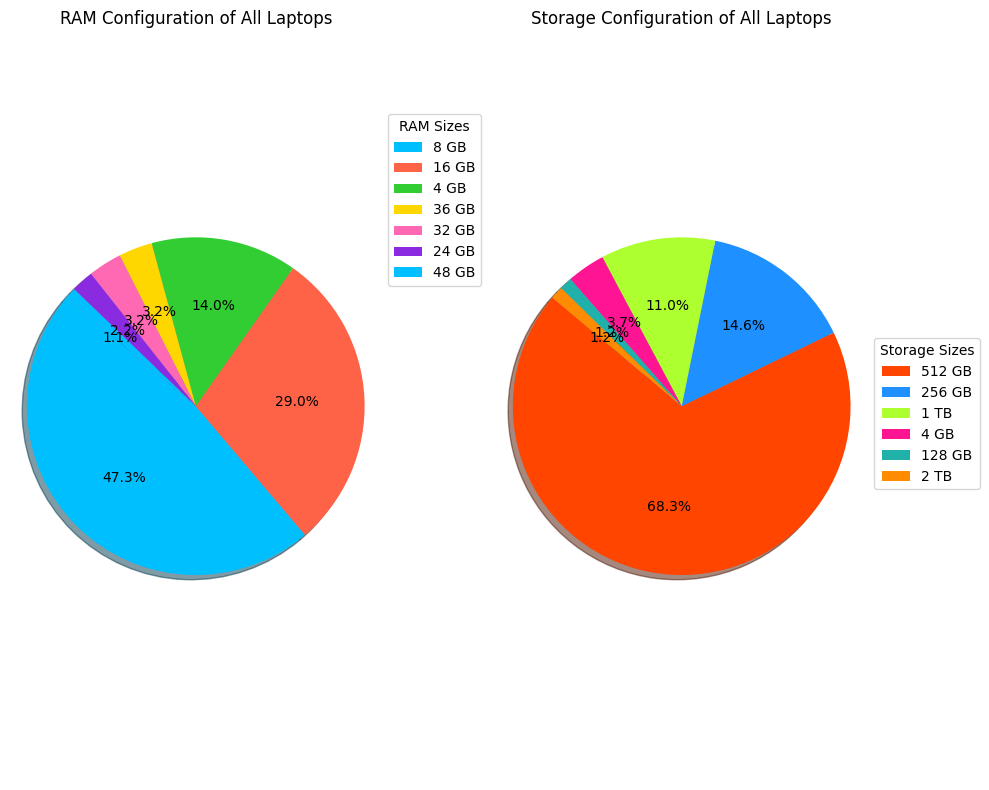

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

# Load the dataset safely
df = pd.read_csv("laptop_file.csv", on_bad_lines='skip', quoting=csv.QUOTE_MINIMAL)

# Extract and clean RAM and Storage
df['RAM'] = df['RAM'].astype(str).str.extract(r'(\d+\s?GB)')[0]
df['Storage'] = df['Storage'].astype(str).str.extract(r'(\d+\s?GB|\d+\s?TB)')[0]

# Count RAM and Storage values
ram_counts = df['RAM'].value_counts()
storage_counts = df['Storage'].value_counts()

# Custom vibrant highlight-style colors
ram_colors = ['#00BFFF', '#FF6347', '#32CD32', '#FFD700', '#FF69B4', '#8A2BE2']
storage_colors = ['#FF4500', '#1E90FF', '#ADFF2F', '#FF1493', '#20B2AA', '#FF8C00']

# Create side-by-side pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

# RAM Pie Chart
wedges1, texts1, autotexts1 = ax1.pie(
    ram_counts,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=ram_colors[:len(ram_counts)],
    shadow=True
)
ax1.set_title("RAM Configuration of All Laptops")
ax1.axis('equal')
ax1.legend(
    wedges1, ram_counts.index, title="RAM Sizes",
    loc="upper left", bbox_to_anchor=(1, 0.9)
)

# Storage Pie Chart
wedges2, texts2, autotexts2 = ax2.pie(
    storage_counts,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=storage_colors[:len(storage_counts)],
    shadow=True
)
ax2.set_title("Storage Configuration of All Laptops")
ax2.axis('equal')
ax2.legend(
    wedges2, storage_counts.index, title="Storage Sizes",
    loc="upper left", bbox_to_anchor=(1, 0.6)
)

# Final layout
plt.tight_layout()
plt.show()


# Discount by CurrentPrice vs. MRP


In [5]:
import pandas as pd
import numpy as np
import csv

# Load dataset safely
df = pd.read_csv("laptop_file.csv", on_bad_lines='skip', quoting=csv.QUOTE_MINIMAL)

# Extract brand from ProductName
df['Brand'] = df['ProductName'].astype(str).str.split().str[0]

# Show all unique brands
brands = df['Brand'].unique()
print("Available brands:", brands)

# Function to clean and convert price columns to float
def clean_price_column(column):
    return (
        column.astype(str)                      # convert to string
              .str.extract(r'(\d+\.?\d*)')[0]   # extract numeric part
              .replace('', np.nan)              # replace empty with NaN
              .astype(float)                    # convert to float
    )

# Clean price columns
df['MRP'] = clean_price_column(df['MRP'])
df['CurrentPrice'] = clean_price_column(df['CurrentPrice'])

# Drop rows with missing prices
df.dropna(subset=['MRP', 'CurrentPrice'], inplace=True)

# Calculate discount percentage
df['Discount (%)'] = ((df['MRP'] - df['CurrentPrice']) / df['MRP']) * 100
df['Discount (%)'] = df['Discount (%)'].round(2)

# Get top 3 discounted products per brand
top_discounts = df.sort_values(by='Discount (%)', ascending=False).groupby('Brand').head(3)

# Final display
print("\nTop 3 Discounted Laptops per Brand:\n")
print(top_discounts[['Brand', 'ProductName', 'MRP', 'CurrentPrice', 'Discount (%)']]
      .sort_values(['Brand', 'Discount (%)'], ascending=[True, False]))


Available brands: ['ASUS' 'Acer' 'Lenovo' 'HP' 'AXL' 'Primebook' 'Apple' 'Infinix' 'Ultimus']

Top 3 Discounted Laptops per Brand:

        Brand                                        ProductName       MRP  \
26       ASUS      ASUS Chromebook Intel Celeron Dual Core N4500   32990.0   
57       ASUS      ASUS Chromebook Intel Celeron Dual Core N4500   32990.0   
75       ASUS      ASUS Chromebook Intel Celeron Dual Core N4500   32990.0   
71        AXL                  AXL Intel Celeron Dual Core N4020   31990.0   
28        AXL                  AXL Intel Celeron Dual Core N4020   31990.0   
80        AXL                  AXL Intel Celeron Dual Core N4020   31990.0   
32       Acer      Acer Chromebook Intel Celeron Dual Core N4500   35999.0   
81       Acer      Acer Chromebook Intel Celeron Dual Core N4500   35999.0   
10       Acer  Acer Aspire 3 Backlit AMD Ryzen 7 Octa Core 7730U   74990.0   
79      Apple                         Apple MacBook Air Apple M4  124900.0   
93      Ap

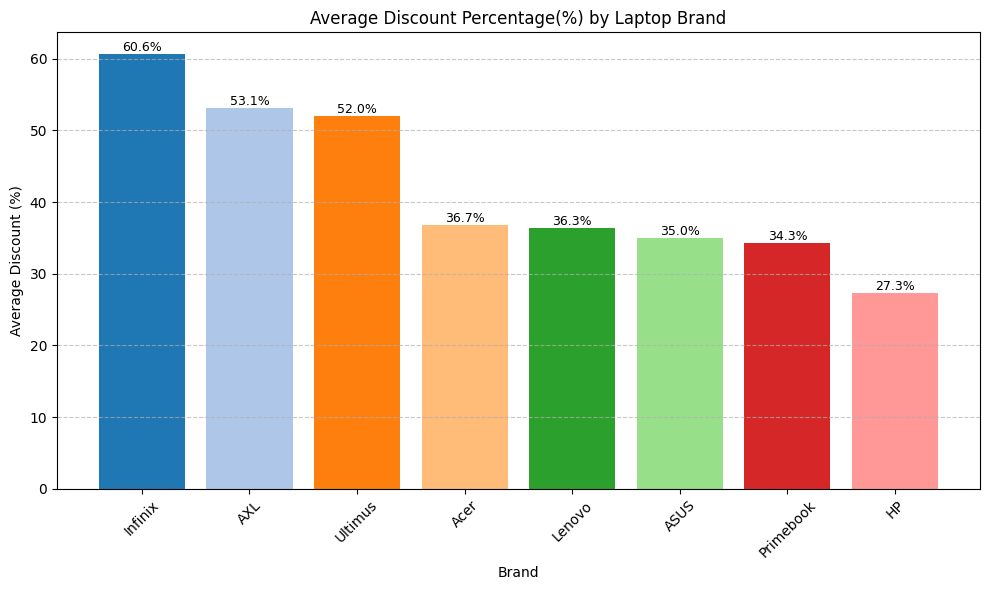

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

# Load dataset safely
try:
    df = pd.read_csv("laptop_file.csv", on_bad_lines='skip', quoting=csv.QUOTE_MINIMAL)
except Exception as e:
    print("Error loading CSV:", e)
    exit()

# Extract brand from ProductName
df['ProductName'] = df['ProductName'].astype(str)
df['Brand'] = df['ProductName'].str.split().str[0]

# Function to safely clean price columns
def clean_price_column(column):
    return (
        column.astype(str)
              .str.extract(r'(\d+\.?\d*)')[0]
              .replace('', np.nan)
              .astype(float)
    )

# Clean and convert price columns
df['MRP'] = clean_price_column(df['MRP'])
df['CurrentPrice'] = clean_price_column(df['CurrentPrice'])

# Drop rows with missing prices
df.dropna(subset=['MRP', 'CurrentPrice'], inplace=True)

# Calculate discount percentage
df['Discount (%)'] = ((df['MRP'] - df['CurrentPrice']) / df['MRP']) * 100
df['Discount (%)'] = df['Discount (%)'].round(2)

# Average discount per brand
avg_discount = df.groupby('Brand')['Discount (%)'].mean().sort_values(ascending=False)

# Generate colors automatically
colors = plt.cm.tab20.colors[:len(avg_discount)]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_discount.index, avg_discount.values, color=colors)
plt.xlabel('Brand')
plt.ylabel('Average Discount (%)')
plt.title('Average Discount Percentage(%) by Laptop Brand')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


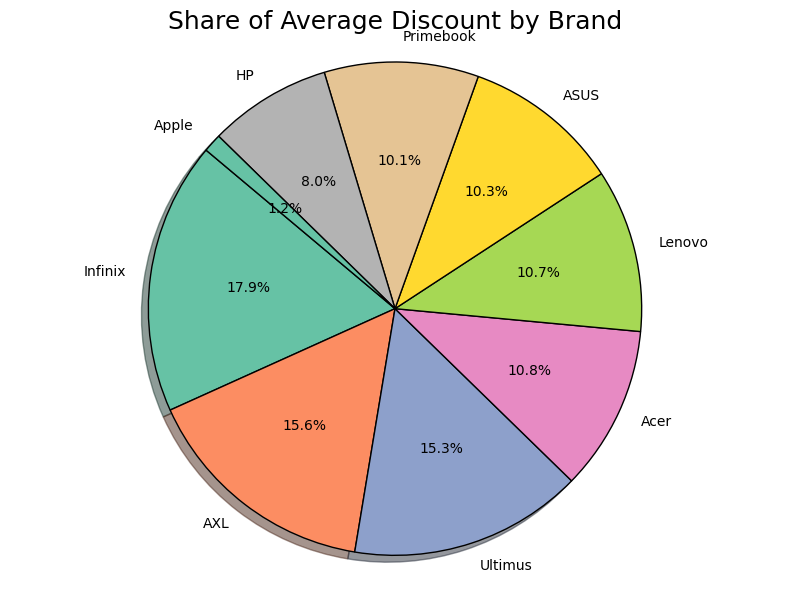

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv

# Load dataset safely
try:
    df = pd.read_csv("laptop_file.csv", on_bad_lines='skip', quoting=csv.QUOTE_MINIMAL)
except Exception as e:
    print("Error loading file:", e)
    exit()

# Ensure ProductName column is string type
df['ProductName'] = df['ProductName'].astype(str)

# Extract brand from product name
df['Brand'] = df['ProductName'].str.split().str[0]

# Function to clean price columns
def clean_price_column(column):
    return (
        column.astype(str)
              .str.extract(r'(\d+\.?\d*)')[0]  # extract numeric portion
              .replace('', np.nan)
              .astype(float)
    )

# Clean price columns
df['MRP'] = clean_price_column(df['MRP'])
df['CurrentPrice'] = clean_price_column(df['CurrentPrice'])

# Drop rows with missing or zero MRP to avoid division by zero
df = df.dropna(subset=['MRP', 'CurrentPrice'])
df = df[df['MRP'] > 0]

# Calculate discount
df['Discount (%)'] = ((df['MRP'] - df['CurrentPrice']) / df['MRP']) * 100
df['Discount (%)'] = df['Discount (%)'].round(2)

# Remove invalid/negative discounts
df = df[df['Discount (%)'] >= 0]

# Group and calculate average discount per brand
avg_discount = df.groupby('Brand')['Discount (%)'].mean().sort_values(ascending=False)

# Filter out brands with no discount (optional)
avg_discount = avg_discount[avg_discount > 0]

# Plot pie chart
colors = sns.color_palette('Set2', n_colors=len(avg_discount))

plt.figure(figsize=(8, 6))
plt.pie(
    avg_discount,
    labels=avg_discount.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
plt.title('Share of Average Discount by Brand', fontsize=18)
plt.axis('equal')  # Ensures the pie chart is circular
plt.tight_layout()
plt.show()


# Average rating by Brand

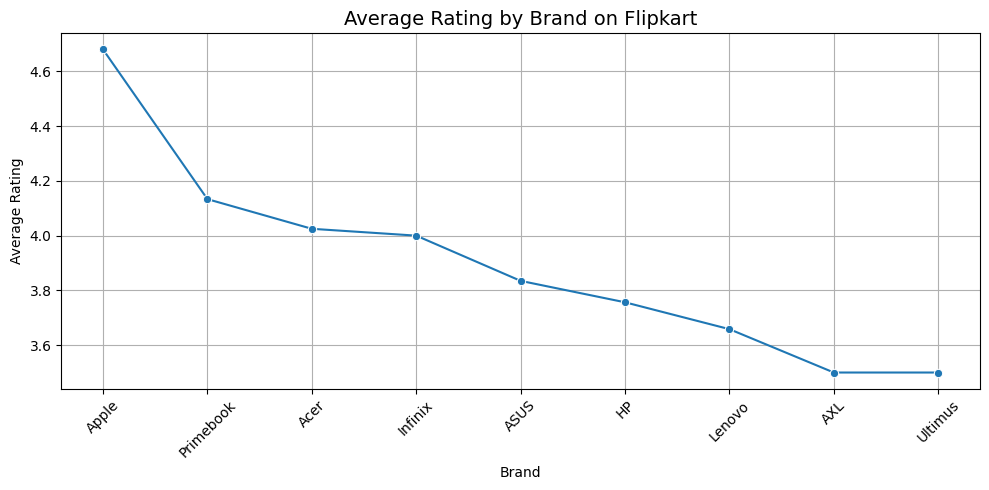

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract brand name (first word) from ProductName
df['Brand'] = df['ProductName'].str.split().str[0]

# Calculate average rating by brand
brand_avg_rating = df.groupby('Brand')['Stars'].mean().reset_index().sort_values(by='Stars', ascending=False)

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(data=brand_avg_rating, x='Brand', y='Stars', marker='o')
plt.title('Average Rating by Brand on Flipkart', fontsize=14)
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Heatmap of ProductName vs. Rating vs. CurrentPrice

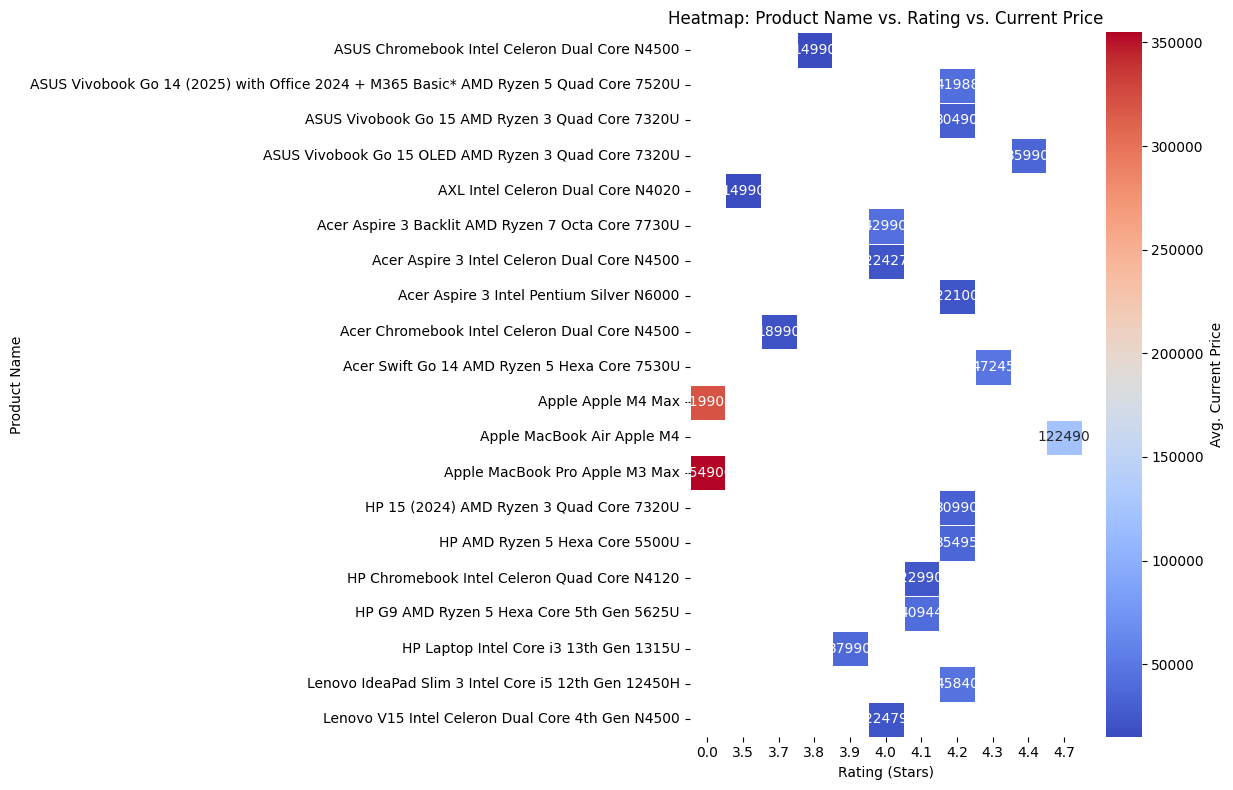

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset safely
df = pd.read_csv('laptop_file.csv', on_bad_lines='skip')

# Keep relevant columns and clean them
df = df[['ProductName', 'Stars', 'CurrentPrice']].dropna()

# Convert numeric columns safely
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')
df['CurrentPrice'] = pd.to_numeric(df['CurrentPrice'], errors='coerce')

# Drop rows with invalid numbers
df.dropna(subset=['Stars', 'CurrentPrice'], inplace=True)

# Limit to top 20 products for readability (optional)
top_products = df['ProductName'].value_counts().head(20).index
df_top = df[df['ProductName'].isin(top_products)]

# Pivot table for heatmap
heatmap_data = df_top.pivot_table(index='ProductName', columns='Stars', values='CurrentPrice', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5, cbar_kws={'label': 'Avg. Current Price'})
plt.title('Heatmap: Product Name vs. Rating vs. Current Price')
plt.xlabel('Rating (Stars)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


# Top Rated products

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('laptop_file.csv', on_bad_lines='skip')

# Ensure relevant columns exist and are clean
df = df[['ProductName', 'Stars', 'CurrentPrice']].dropna()
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')

# Drop rows with invalid data
df.dropna(subset=['Stars'], inplace=True)

# Find the maximum rating
max_rating = df['Stars'].max()

# Filter products with max rating
top_rated_products = df[df['Stars'] == max_rating]

# Display the top-rated product(s)
print(top_rated_products.sort_values(by='CurrentPrice', ascending=False).head(10))


                        ProductName  Stars  CurrentPrice
95       Apple MacBook Air Apple M4    4.7        135990
79       Apple MacBook Air Apple M4    4.7        117990
76       Apple MacBook Air Apple M4    4.7        117990
93       Apple MacBook Air Apple M4    4.7        117990
74  Apple 2020 Macbook Air Apple M1    4.7        109900


# Average Price by Processor Type 

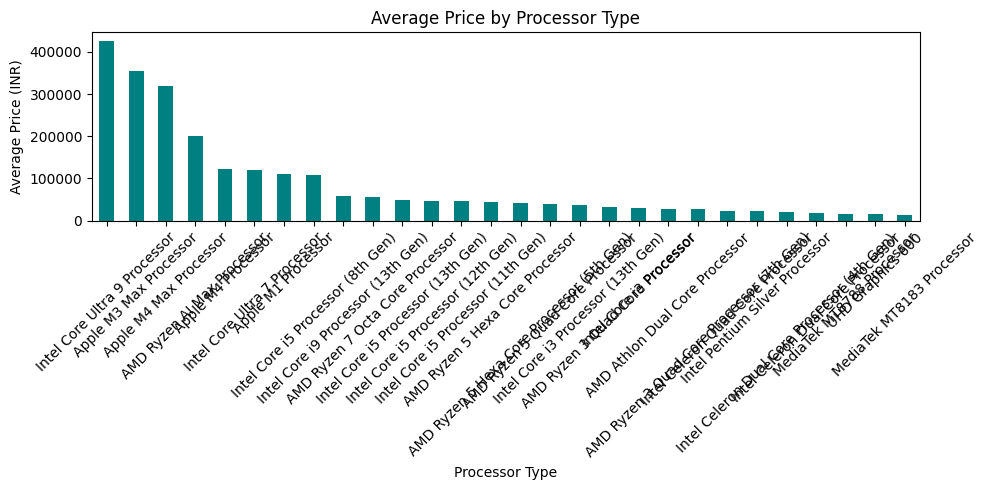

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('laptop_file.csv', on_bad_lines='skip')

# Clean CurrentPrice column
df['CurrentPrice'] = pd.to_numeric(df['CurrentPrice'], errors='coerce')

# Drop rows with missing Processor or Price
df = df.dropna(subset=['Processor', 'CurrentPrice'])

# Group by Processor and calculate average price
processor_price = df.groupby('Processor')['CurrentPrice'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
processor_price.plot(kind='bar', color='teal')
plt.title('Average Price by Processor Type')
plt.ylabel('Average Price (INR)')
plt.xlabel('Processor Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Average Price by RAM Size

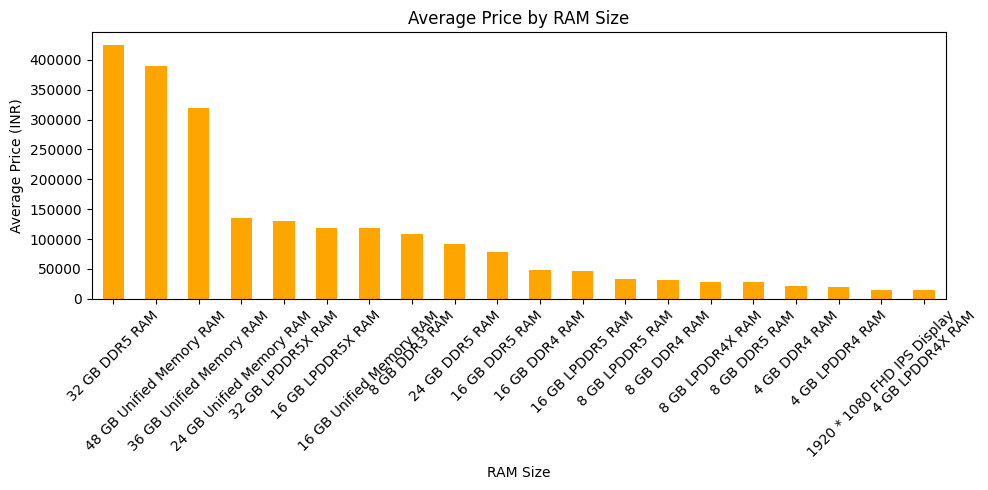

In [12]:
# Drop rows with missing RAM
df = df.dropna(subset=['RAM'])

# Group by RAM and calculate average price
ram_price = df.groupby('RAM')['CurrentPrice'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
ram_price.plot(kind='bar', color='orange')
plt.title('Average Price by RAM Size')
plt.ylabel('Average Price (INR)')
plt.xlabel('RAM Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# CurrentPrice vs. Stars Rating


C:\Users\Hp\AppData\Local\Temp\ipykernel_12592\2241959480.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stars', y='CurrentPrice', data=df, palette='coolwarm')


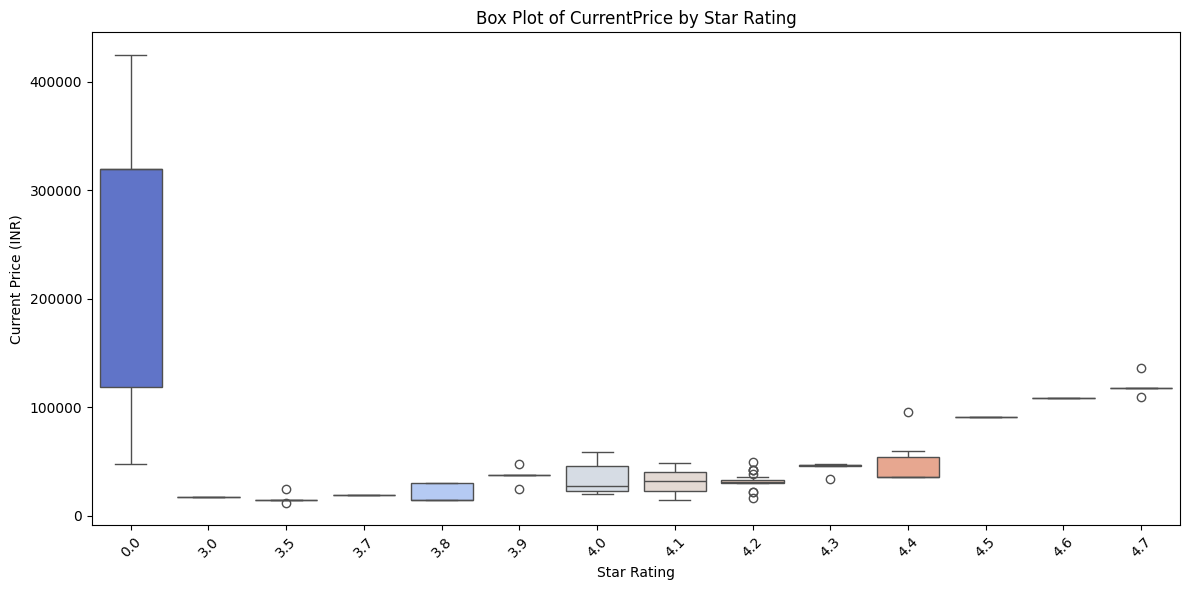

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('laptop_file.csv', on_bad_lines='skip')

# Convert necessary columns to numeric
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')
df['CurrentPrice'] = pd.to_numeric(df['CurrentPrice'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['Stars', 'CurrentPrice'])

# Round stars to one decimal place to avoid too many unique values
df['Stars'] = df['Stars'].round(1)

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Stars', y='CurrentPrice', data=df, palette='coolwarm')

plt.title('Box Plot of CurrentPrice by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Current Price (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
